# Data science challenge - Trips!

In this notebook, we will explore the dataset of NYC green taxi trips for September 2015. Along with the questions, I will carry out data observation, cleaning, imputation, feature engineering, and finally setup a predictive model for estimating tip percentage from selected feature variables. There will be hypothesis, insights and potential future exploration mentioned along the way. Enjoy!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from scipy import stats

## <span style="color:DarkTurquoise">Q1: rows and columns loaded</span>

### Load and observe data

You can access the data [here](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml). This [data dictionary](http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf) explains the meaning of the variables. Please put the downloaded data file into the current directory to make sure the path file is correct.

In [2]:
path = 'green_tripdata_2015-09.csv'
if os.path.exists(path):
    green = pd.read_csv(path)

In [3]:
green.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


Note: we could observe different naming conventions in the column names. Some start with lowercase letter (lpep_pickup_datetime) while most start with uppercase letter. Some use underline while others use camel style. it's not necessary to deal with it for now, later in data cleaning I will add new variables and change some column names.

In [4]:
green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

Note: Ehail_fee has all nan values, so there should be no worries to drop this column; there are 1494926 rows, 21 columns; there are nan values in Trip_type; lpep_pickup_datetime/Lpep_dropoff_datetime should be changed into datetime, and Store_and_fwd_flag is the only categorical variable.

### <span style="color:DarkTurquoise">Answer to Q1: there are 1494926 rows and 21 columns in the original dataset.</span>

In [5]:
green.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


Note: for numerical variables, illegal values can be observed. According to the [data dictionary](http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf), RateCodeID has a range of 1 to 6, a value of 99 appears as max; we could also drop the rows with a 0 Passenger_count/Trip_distance since those won't be related to tips, but I will look closer at these variables later; Extra should only contain values of 0.5 or 1, 1.2 appeared as max; negative values appear in Fare_amount/Extra/MTA-tax/Tip_amount/Tolls_amount/improvement_surcharge/Total_amount.

In [6]:
print('rows:', green.shape[0])
print('cols:', len(green.columns))
print(green.columns)

rows: 1494926
cols: 21
Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')


Note: there is a space in 'Trip_type '.

### Dealing with the problem found in observation

In [7]:
# drop Ehail_fee
green.drop('Ehail_fee', axis=1, inplace=True)
green.shape

(1494926, 20)

In [8]:
# change lpep_pickup_datetime/Lpep_dropoff_datetime to datetime
green['pickup_time'] = pd.to_datetime(green.lpep_pickup_datetime)
green['dropoff_time'] = pd.to_datetime(green.Lpep_dropoff_datetime)
green.drop('lpep_pickup_datetime', axis=1, inplace=True)
green.drop('Lpep_dropoff_datetime', axis=1, inplace=True)
print(green['pickup_time'].dtypes, green['dropoff_time'].dtypes, green.shape)

datetime64[ns] datetime64[ns] (1494926, 20)


In [9]:
# change Store_and_fwd_flag into categorical 
green['flag_cat'] = green['Store_and_fwd_flag'].astype('category').cat.codes
print(green['flag_cat'].value_counts())
green.drop('Store_and_fwd_flag', axis=1, inplace=True)
print(green.shape)

0    1486192
1       8734
Name: flag_cat, dtype: int64
(1494926, 20)


In [10]:
# imputation of Trip_type: fill nan with the most frequent value
green.rename(columns={'Trip_type ':'Trip_type'}, inplace=True)
green['Trip_type'].fillna(value=green['Trip_type'].value_counts().reset_index()['index'][0], inplace=True)
green.isnull().sum().sum()

0

In [11]:
# imputation of RateCodeID: change illegal value to the most frequent value
green.loc[green[green['RateCodeID'] > 6].index, 'RateCodeID'] = green['RateCodeID'].value_counts().reset_index()['index'][0]
green['RateCodeID'].value_counts()

1    1454470
5      33943
2       4435
3       1117
4        925
6         36
Name: RateCodeID, dtype: int64

In [12]:
# observe rows with 0 Passenger_count
zero_p = green.loc[green['Passenger_count'] == 0]
zero_p.head()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup_time,dropoff_time,flag_cat
1097,1,5,-73.921661,40.706581,-73.895645,40.703232,0,1.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0,2015-09-01 00:44:17,2015-09-01 00:51:18,0
2129,1,5,-73.931175,40.702847,-74.017197,40.642117,0,9.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0,2015-09-01 01:07:25,2015-09-01 01:27:51,0
2551,2,5,-73.953094,40.680672,-73.897552,40.677704,0,3.52,20.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0,2015-09-01 02:21:00,2015-09-01 02:33:33,0
5572,1,5,-73.925659,40.838451,-73.923317,40.816864,0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0,2015-09-01 07:52:57,2015-09-01 08:05:09,0
10310,1,5,-73.948143,40.837135,-73.942070,40.842621,0,0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0,2015-09-01 09:04:28,2015-09-01 09:08:16,0


Note: while Passenger_count = 0, some of the rows still have non-zero Fare_amount (and even pickup/dropoff time), so I assume some of the rows might have a wrong Passenger_count value. I will have a closer look at the following variables to verify this assumption.

In [13]:
for col in ['RateCodeID', 'Fare_amount', 'Payment_type']:
    print(zero_p[col].value_counts())

5    432
1      4
3      3
2      1
Name: RateCodeID, dtype: int64
 0.00      172
 10.00      18
 8.00       18
 12.00      16
 15.00      15
 7.00        8
 20.00       8
 40.00       7
 13.00       7
 18.82       5
 22.00       4
 45.00       4
 25.00       4
 9.50        4
 13.50       4
 18.00       4
 11.00       4
 6.50        4
 0.01        4
 10.50       4
 9.00        4
 7.50        4
 3.50        3
 8.50        3
 14.00       3
 30.00       3
 6.00        3
 32.00       3
 5.50        3
 38.50       2
          ... 
 35.50       1
 26.00       1
 66.00       1
 65.50       1
 44.00       1
 88.50       1
 14.44       1
 30.50       1
-12.00       1
 54.00       1
 15.50       1
-1.00        1
 132.00      1
-132.00      1
 45.50       1
 12.35       1
 32.50       1
 17.58       1
-3.00        1
 92.00       1
-13.00       1
 19.26       1
 41.00       1
 16.50       1
 21.50       1
 19.00       1
 58.26       1
 31.00       1
 0.27        1
 14.46       1
Name: Fare_amount,

Note: from this observation, I think we can safely drop the rows with 0 Fare_amount. For other rows, I will fill Passenger_count with median. Also, except from negative Fare_amount, values smaller than 2.5 appear. The starting price of NYC Green Taxi is $2.5 according to NYC.gov, so these values are also illegal.

In [14]:
idx_to_drop = green.loc[(green['Fare_amount'] > 0) & (green['Fare_amount'] < 2.5)].index
print('# rows to drop:', len(idx_to_drop))
green.drop([idx for idx in idx_to_drop], inplace=True)

idx_to_drop = green.loc[(green['Passenger_count'] == 0) & (green['Fare_amount'] == 0)].index
print('# rows to drop:', len(idx_to_drop))
green.drop([idx for idx in idx_to_drop], inplace=True)

print(green.shape)
green.loc[green[green['Passenger_count'] == 0].index, 'Passenger_count'] = green['Passenger_count'].median()
print(green['Passenger_count'].value_counts())

# rows to drop: 572
# rows to drop: 172
(1494182, 20)
1.0    1255582
2.0     114983
5.0      57904
3.0      33804
6.0      22091
4.0       9760
8.0         29
9.0         15
7.0         14
Name: Passenger_count, dtype: int64


Note: for the remaining 0 Passenger_count rows, I impute with median value. But not that fast! As Q4 requires a predictive model, it's better do the imputation after a train-test split on the whole dataset to avoid data leakage. 

In [15]:
# observe rows with 0 Trip_distance
zero_d = green.loc[green['Trip_distance'] == 0]
zero_d.shape

(20245, 20)

Note: after filtering 0 Fare_amount there are still many rows with 0 Trip_distance. As Q2 asks for its distribution, I will deal with this variable later.

In [16]:
# imputation of Extra
green.drop([idx for idx in green.loc[(green['Extra'].abs() != 1) & (green['Extra'].abs() != 0.5) & (green['Extra'] != 0)].index], inplace=True)
print(green['Extra'].value_counts(), green.shape)

 0.0    683784
 0.5    566412
 1.0    242728
-0.5       889
-1.0       365
Name: Extra, dtype: int64 (1494178, 20)


In [17]:
# deal with negative values
print('Check # negative values:')
for col in ['Fare_amount', 'Extra', 'MTA_tax','Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount']:
    green[col] = green[col].abs()
    print(col, len(green[green[col] < 0].index))

Check # negative values:
Fare_amount 0
Extra 0
MTA_tax 0
Tip_amount 0
Tolls_amount 0
improvement_surcharge 0
Total_amount 0


## <span style="color:DarkTurquoise">Q2: histogram of Trip_distance</span>

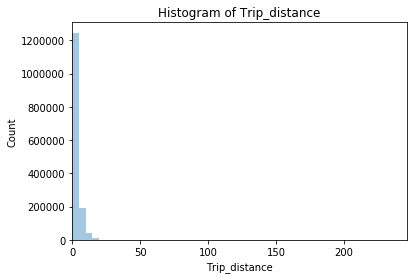

In [18]:
# green['Trip_distance'].plot(kind='hist', bins=50)
plt.title('Histogram of Trip_distance')
plt.xlabel('Trip_distance')
plt.ylabel('Count')
plt.xlim((green['Trip_distance'].min(), green['Trip_distance'].max()))

sns.distplot(green['Trip_distance'], bins=50, kde=False)

Note: a long tail is observed, which means there are outlier trip with unusually long distance. Excluding the outliers who are 3 standard deviation from mean, the distribution looks as follows.

## <span style="color:DarkTurquoise">The graph below is the most representative distribution of Trip_distance.</span>

The idea of identifying outlier at beyond 3 standard deviation comes from [this post](https://github.com/kthouz/NYC_Green_Taxi).

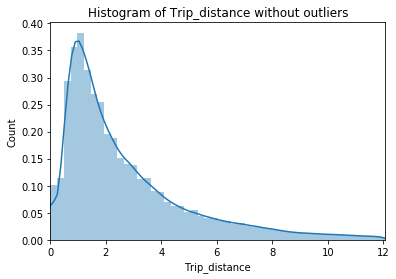

In [19]:
v = green['Trip_distance']
outliers = (v - v.mean()).abs() > v.std()*3
# v[~outliers].plot(kind='hist', bins=50)
plt.title('Histogram of Trip_distance without outliers')
plt.xlabel('Trip_distance')
plt.ylabel('Count')
plt.xlim((v[~outliers].min(), v[~outliers].max()))
sns.distplot(v[~outliers], bins=50)

### <span style="color:DarkTurquoise"><br>Answer to Q2:</br><br> </br><br>Structure: the distribution is highly right-skewed, which means a large proportion people take taxi for a short distance, and as the distance to destination become longer, the frequency of such trips become lower.</br>  <br> </br><br>Hypothesis: this aligns well with the real life scenario, the phenomenon might follows a lognormal distribution.</br></span>

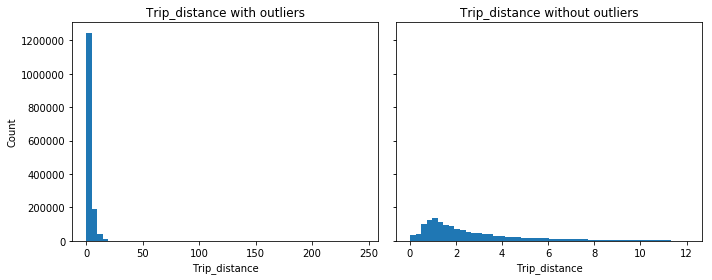

In [20]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,4), sharey=True)
green['Trip_distance'].plot(kind='hist', bins=50, ax=ax1)
ax1.set_title('Trip_distance with outliers')
ax1.set_xlabel('Trip_distance')
ax1.set_ylabel('Count')

v = green['Trip_distance']
outliers = (v - v.mean()).abs() > v.std()*3
v[~outliers].plot(kind='hist', bins=50, ax=ax2)
ax2.set_title('Trip_distance without outliers')
ax2.set_xlabel('Trip_distance')

plt.tight_layout()

Note: this is a complementary comparison. Although this side-by-side comparison cannot illustrate the distribution of Trip_distance so well, we can observe the impact of outliers. Notice the count of the highest bar from the left graph is approximately the sum of count from the right graph. For the clear illustration for distribution, please refer to the last block of codes.

## <span style="color:DarkTurquoise">Q3-1: mean and median trip distance grouped by hour of day</span>

    mean_dist  median_dist
0    3.116141         2.20
1    3.017833         2.12
2    3.046598         2.14
3    3.194429         2.20
4    3.525938         2.36
5    4.135145         2.90
6    4.057262         2.85
7    3.284835         2.17
8    3.047975         1.98
9    2.999596         1.96
10   2.944422         1.92
11   2.912562         1.88
12   2.904905         1.89
13   2.880259         1.84
14   2.866145         1.83
15   2.857249         1.81
16   2.781190         1.80
17   2.679822         1.78
18   2.653856         1.80
19   2.715991         1.85
20   2.777105         1.90
21   2.999758         2.03
22   3.185496         2.20
23   3.191918         2.22


(0, 23)

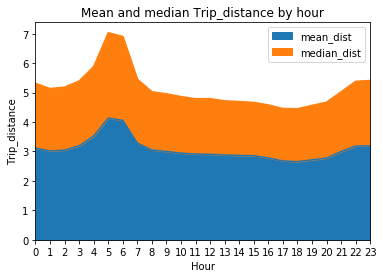

In [21]:
green['pickup_hour'] = green['pickup_time'].dt.hour
grp = green.groupby('pickup_hour')['Trip_distance']

mean_dist = grp.mean()
median_dist = grp.median()
mmt = pd.concat([mean_dist, median_dist], axis=1).reset_index().drop('pickup_hour', axis=1)
mmt.columns = ['mean_dist', 'median_dist']
print(mmt)

mmt.plot(kind='area')
plt.title('Mean and median Trip_distance by hour')
plt.xlabel('Hour')
plt.ylabel('Trip_distance')
plt.xticks(np.arange(24))
plt.xlim((0,23))

# table = green.pivot_table(index='pickup_hour', values='Trip_distance', aggfunc=('mean', 'median'))
# table.columns = ['mean_dist', 'median_dist']
# print(table)

## <span style="color:DarkTurquoise">Q3-2: trip to airports</span>

Note: as observed from [data dictionary](http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf), LGA airport is not included in RateCodeID, so we have to manually find out from the latitude and longitude. I choose bottom-left/upper-right corner of a rectangle as an estimation of the LGA area. This estimation will be risky as it may include area that is not a taxi dropoff spot. As the number of trips to LGA is similar to the number of trips to JFK/EWR with LGA being more popular among the 3, the estimation might be probable.

In [22]:
# estimate LGA coordinates
mask = (((green['Dropoff_latitude'] >= 40.768423) & 
          (green['Dropoff_latitude'] <= 40.773098) & 
          (green['Dropoff_longitude'] >= -73.884783) & 
          (green['Dropoff_longitude'] <= -73.865387)) |
        ((green['Pickup_latitude'] >= 40.768423) & 
          (green['Pickup_latitude'] <= 40.773098) & 
          (green['Pickup_longitude'] >= -73.884783) & 
          (green['Pickup_longitude'] <= -73.865387)))

# add new column to specify airports
# Non-airport:0, LGA:1, JFK:2, EWR:3
green['airport'] = 0
green.loc[green[mask].index, 'airport'] = 1
green.loc[green[green['RateCodeID'] == 2].index, 'airport'] = 2
green.loc[green[green['RateCodeID'] == 3].index, 'airport'] = 3
print('# trips to airports:')
print(green['airport'].value_counts())

print('\nFor each airport:')
print(green.groupby('airport')['Fare_amount'].mean())
print('\nOverall:')
airport = green[green['airport'] != 0]
print(airport.shape[0])
print(airport['Fare_amount'].mean())

# trips to airports:
0    1484449
2       4435
1       4177
3       1117
Name: airport, dtype: int64

For each airport:
airport
0    12.420651
1    18.513773
2    51.788952
3    49.690242
Name: Fare_amount, dtype: float64

Overall:
9729
37.26179771816219


### <span style="color:DarkTurquoise">Answer to Q3-2: # transactions to LGA/JFK/EWR are 4177, 4435, 1117; average fare are 18.513773, 51.788952, 49.690242 accordingly.</span>

### Other interesting characteristics 
### - proportion of airport trips

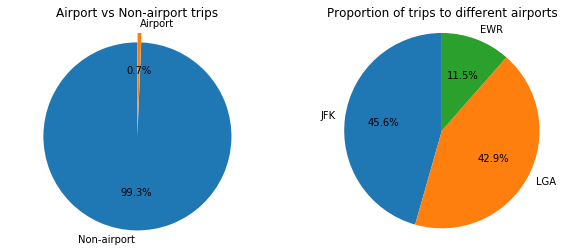

In [23]:
# proportion of airport trips
labels1 = ['Non-airport', 'Airport']
sizes1 = [len(green[green['airport'] == 0].index), green.shape[0] - len(green[green['airport'] == 0].index)]
explode1 = (0,0.1)

labels2 = ['JFK', 'LGA', 'EWR']
sizes2 = green['airport'].value_counts()[1:]

fig1, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,4))
ax1.pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title('Airport vs Non-airport trips')
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Proportion of trips to different airports')
plt.show()

### - proportion of payment types

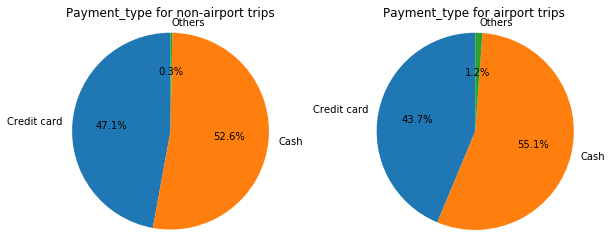

In [24]:
# proportion of payment types
non_airport = green[green['airport'] == 0]

labels = ['Credit card', 'Cash', 'Others']
cnt1 = non_airport['Payment_type'].value_counts().sort_index()
cnt2 = airport['Payment_type'].value_counts().sort_index()
sizes1 = [cnt1[1], cnt1[2], cnt1[3:].sum()]
sizes2 = [cnt2[1], cnt2[2], cnt2[3:].sum()]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 4))
ax1.pie(sizes1, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title('Payment_type for non-airport trips')
ax2.pie(sizes2, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Payment_type for airport trips')
plt.show()

### - proportion of trip types

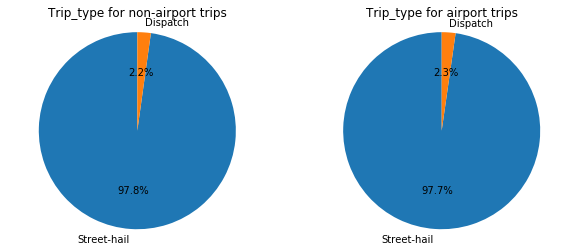

In [25]:
# proportion of trip types
labels = ['Street-hail', 'Dispatch']
sizes1 = non_airport['Trip_type'].value_counts().sort_index()
sizes2 = airport['Trip_type'].value_counts().sort_index()

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 4))
ax1.pie(sizes1, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title('Trip_type for non-airport trips')
ax2.pie(sizes2, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Trip_type for airport trips')
plt.show()

Note: I thought there might be more people use credit card/call dispatch to go to airports, because these trips could be pre-aranged according to flight time. However, it turns out there is not much discrepancy between non-airport and airport trips for these two factors.

### - trip distance distribution

Note: recall I haven't deal with the trips with 0 Trip_distance in the data cleaning step. Here I want to estimate Trip_distance from Fare_amount with an intuitive linear regression, because according to [Taxicab Rate of Fare](http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml), amount of fare increases linearly as trip distance increases. Also, I only used data of airport trips to fit the model due to computation cost. Afterwards, I infer Trip_distance with a 0 value for both non-airport and airport trips. 

<span style="color:red">Mistake: still, in order to avoid data leakage in Q4, I should make a copy of the dataframe for the purpose of illustrating the distribution, and will carry out same imputaiton on the train set again later.</span>

Relationship between Fare_amount and Trip_distance: y=0.2x+0.4


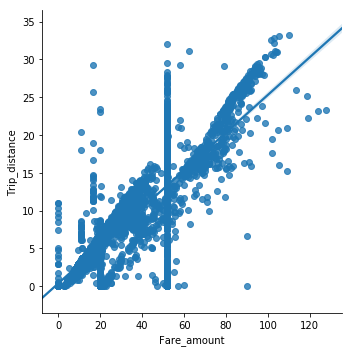

In [26]:
# fare~distance regression
d = airport[(airport['Trip_distance'] != 0) & (airport['Trip_distance'] - airport['Trip_distance'].mean() <= airport['Trip_distance'].std() * 3)]
slope, intercept, r_value, p_value, std_err = stats.linregress(d['Fare_amount'], d['Trip_distance'])
sns.lmplot(x='Fare_amount', y='Trip_distance', data=d)
print('Relationship between Fare_amount and Trip_distance: y={0:.1f}x+{1:.1f}'.format(slope, intercept))

In [27]:
# impute Trip_distance from Fare_amount
idx = green[green['Trip_distance'] == 0].index
print('# trips with 0 Trip_distance:', len(idx))
green.loc[idx, 'Trip_distance'] = 0.2 * green.loc[idx, 'Fare_amount'] + 0.4
print(green.loc[idx, ['Trip_distance', 'Fare_amount']].head())

# trips with 0 Trip_distance: 20243
    Trip_distance  Fare_amount
0            1.96          7.8
1            9.40         45.0
28           1.10          3.5
31          10.80         52.0
44           2.20          9.0


(0, 32.8)

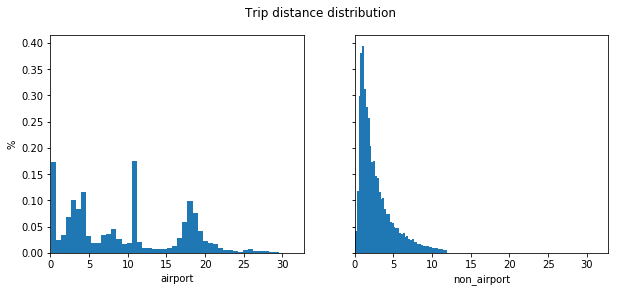

In [28]:
# trip distance distribution for non-airport and airport trips
airport_non_zero = green[green['airport'] != 0]
non_airport_non_zero = green[green['airport'] == 0]
v1 = airport_non_zero['Trip_distance']
v1 = v1[~((v1 - v1.mean() > v1.std() * 3))]
v2 = non_airport_non_zero['Trip_distance']
v2 = v2[~((v2 - v2.mean() > v2.std() * 3))]
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(10,4), sharey=True)
v1.plot(kind='hist', bins=50, density=True, ax=ax1)
v2.plot(kind='hist', bins=50, density=True, ax=ax2)
plt.suptitle('Trip distance distribution')
ax1.set_xlabel('airport')
ax1.set_ylabel('%')
ax1.set_xlim((0, v1.max()))
ax2.set_xlabel('non_airport')
ax2.set_xlim((0, v1.max()))

Note: with estimated Trip_distance, there isn't a huge spike at 0 value in both graphs anymore, which is more a realistic situation. From the airport trip graph, we can observe spikes at around 4, 11, 18 miles, which might correspond to different destination airports.

### - pickup hour distribution

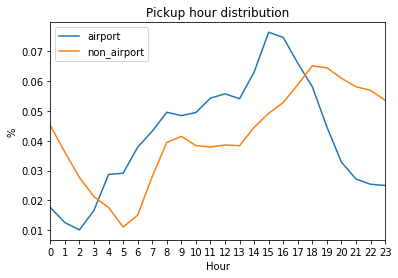

In [30]:
airport['pickup_hour'].value_counts(normalize=True).sort_index().plot()
non_airport['pickup_hour'].value_counts(normalize=True).sort_index().plot()
plt.title('Pickup hour distribution')
plt.xlabel('Hour')
plt.xlim((0,23))
plt.xticks(np.arange(24))
plt.ylabel('%')
plt.legend(['airport', 'non_airport'])

Note: it might be that most people buy flight departing in the evening, so the number of trips peaks at the afternoon pickup hours. 

## <span style="color:DarkTurquoise">Q4-1: tip as percentage of total fare</span>

In [31]:
green['Tip_percent'] = green['Tip_amount']/green['Total_amount']*100
print(green['Tip_percent'].describe())

count    1.490170e+06
mean     6.655879e+00
std      8.873516e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e+01
max      1.000000e+02
Name: Tip_percent, dtype: float64


In [32]:
print('# trips with nan Tip_percent', len(green[green['Tip_percent'].isnull() == True].index))
green.dropna(subset=['Tip_percent'], inplace=True)
print(green.shape)

# trips with nan Tip_percent 4008
(1490170, 23)


Note: there still are nan in Tip_percent. Having a closer look, for these rows, Fare_amount/Tip_amount/Total_amount are all 0s. Although with the linear regression between Fare_amount and Trip_distance, it is possible to estimate Fare_amount for these rows, but still we cannot guess Tip_amount out of blue. Thus, I choose to drop these rows.

## <span style="color:DarkTurquoise">Q4-2: predictive model for tip percentage</span>

### Prepare more meaningful factors for the model

In [33]:
green.columns

Index(['VendorID', 'RateCodeID', 'Pickup_longitude', 'Pickup_latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount',
       'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type',
       'Trip_type', 'pickup_time', 'dropoff_time', 'flag_cat', 'pickup_hour',
       'airport', 'Tip_percent'],
      dtype='object')

In [34]:
# group by different time window
green['pickup_date'] = green['pickup_time'].dt.day
green['dropoff_hour'] = green['dropoff_time'].dt.hour
green['dropoff_date'] = green['dropoff_time'].dt.day

# direction
green['direction'] = 0
green.loc[(green['Dropoff_longitude'] - green['Pickup_longitude'] > 0) & (green['Dropoff_latitude'] - green['Pickup_latitude'] > 0), 'direction'] = 1
green.loc[(green['Dropoff_longitude'] - green['Pickup_longitude'] > 0) & (green['Dropoff_latitude'] - green['Pickup_latitude'] < 0), 'direction'] = 2
green.loc[(green['Dropoff_longitude'] - green['Pickup_longitude'] < 0) & (green['Dropoff_latitude'] - green['Pickup_latitude'] > 0), 'direction'] = 3
green.loc[(green['Dropoff_longitude'] - green['Pickup_longitude'] < 0) & (green['Dropoff_latitude'] - green['Pickup_latitude'] < 0), 'direction'] = 4
print(green['direction'].value_counts())

# drop highly correlated factors to reduce noise
pickup_time = green['pickup_time']
dropoff_time = green['dropoff_time']
green.drop(['Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude', 'pickup_time', 'dropoff_time'], axis=1, inplace=True)
print(green.shape)

4    434190
1    386337
2    345688
3    318056
0      5899
Name: direction, dtype: int64
(1490170, 21)


In [36]:
# check illegal and null values
col_discrete = ['VendorID','flag_cat','RateCodeID','Passenger_count','Payment_type','Trip_type','pickup_hour', 'pickup_date', 'dropoff_hour', 'dropoff_date', 'airport', 'direction']
col_continuous = ['Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax','Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Tip_percent']

for col in col_discrete:
    print('\n',col)
    print(green[col].value_counts())
    print(green[col].isnull().value_counts())
for col in col_continuous:
    print('\n',col)
    print(green[col].isnull().value_counts())


 VendorID
2    1167996
1     322174
Name: VendorID, dtype: int64
False    1490170
Name: VendorID, dtype: int64

 flag_cat
0    1481601
1       8569
Name: flag_cat, dtype: int64
False    1490170
Name: flag_cat, dtype: int64

 RateCodeID
1    1453668
5      30014
2       4417
3       1115
4        920
6         36
Name: RateCodeID, dtype: int64
False    1490170
Name: RateCodeID, dtype: int64

 Passenger_count
1.0    1252287
2.0     114524
5.0      57854
3.0      33662
6.0      22087
4.0       9702
8.0         29
7.0         14
9.0         11
Name: Passenger_count, dtype: int64
False    1490170
Name: Passenger_count, dtype: int64

 Payment_type
2    779578
1    700935
3      5261
4      4324
5        72
Name: Payment_type, dtype: int64
False    1490170
Name: Payment_type, dtype: int64

 Trip_type
1.0    1460603
2.0      29567
Name: Trip_type, dtype: int64
False    1490170
Name: Trip_type, dtype: int64

 pickup_hour
18    97064
19    95971
20    90607
17    87808
21    86363
22    84513
2

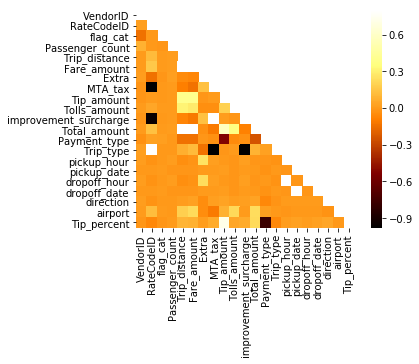

In [37]:
ordered_col = ['VendorID', 'RateCodeID', 'flag_cat', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount',
       'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type',
       'Trip_type', 'pickup_hour', 'pickup_date', 'dropoff_hour',  'dropoff_date', 'direction', 
       'airport', 'Tip_percent']
green = green[ordered_col]

corr = green.corr()
factor_mask = np.zeros_like(corr, dtype=np.bool)
factor_mask[np.triu_indices_from(factor_mask)] = True
sns.heatmap(corr, vmax = .8, square=True, cmap = 'afmhot', mask=factor_mask)

plt.show()

Note: from the last line of this correlation map, we can observe the following: Tip_percent is highly correlated to Payment_type, Tip_amount; there's also correlation between Tip_percent and Total_amount, RateCodeID, Trip_type. Some of the factor groups are also highly correlated, such as Trip_type, MTA_tax, improvement_surcharge.

### Model setup

In [38]:
from sklearn.model_selection import train_test_split

features = np.asarray(green.drop('Tip_percent', axis=1))
labels = np.asarray(green['Tip_percent'])
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

regr = RandomForestRegressor(n_estimators=100, random_state=10).fit(train_features, train_labels)
preds = regr.predict(test_features)

print('Performance (r2 score):', r2_score(test_labels, preds))

Performance (r2 score): 0.999781562270028


Note: first, to estimate a continuous value Tip_percent from a series of variables, this should be a regression problem. Second, as there are still multiple factors that are highly correlated, I choose random forest regressor to deal with feature selection robustly. Third, for metrics, r2 score is chosen to evaluation how 'close' the regression prediction is to the true target value. 

For this result, I highly doubt that the model overfitted. Possible reason could be: model overfits on noise instead of signal; trees become too deep; data leakage caused by regression imputation. For future work, a more thorough analysis of features should be carried out;  a grid search on hyperparameters such as max_depth, max_features, min_samples_leaf would be helpful; train-test split before major imputation is carried out and only impute on training set.

However, I still feel the problem is a little ill-defined. Notice we have Tip_amount and Total_amount as variables, so Tip_percent could be directly infer from them. There are inheritted relationships between all the fare related variables. For example, even if I drop the Total_amount column, the values can still be inferred from a sum of all appeared fees. Perhaps we should drop both Tip_amount and Total_amount and let the model predict tips on the remaining features, and then directly calculate Tip_percent from there.

                       importance
feature                          
Tip_amount                  0.927
Fare_amount                 0.054
Total_amount                0.018
VendorID                    0.000
direction                   0.000
dropoff_date                0.000
dropoff_hour                0.000
pickup_date                 0.000
pickup_hour                 0.000
Trip_type                   0.000
Payment_type                0.000
improvement_surcharge       0.000
RateCodeID                  0.000
Tolls_amount                0.000
MTA_tax                     0.000
Extra                       0.000
Trip_distance               0.000
Passenger_count             0.000
flag_cat                    0.000
airport                     0.000


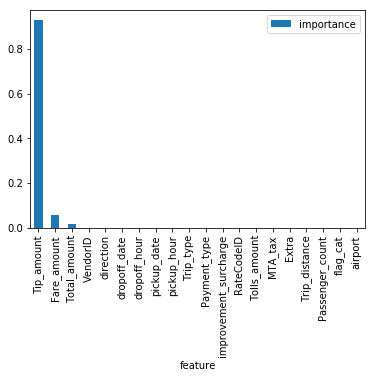

In [45]:
importances = pd.DataFrame({'feature': green.columns[:-1], 'importance': np.round(regr.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
print(importances)
importances.plot.bar()

Note: plotting the feature importance confirms my doubt. The only feature that are actually used in the model is Tip_amount, Fare_amount and Total_amount! Code for plotting feature importance is from [this post](https://www.kaggle.com/jkokatjuhha/in-depth-visualisations-simple-methods).

In [ ]:
features_new = np.asarray(green.drop(['Tip_percent', 'Tip_amount', 'Total_amount'], axis=1))
train_features_new, test_features_new, train_labels_new, test_labels_new = train_test_split(features_new, labels)

regr_new = RandomForestRegressor(n_estimators=100, random_state=10).fit(train_features_new, train_labels_new)
preds_new = regr_new.predict(test_features_new)

print('Performance (r2 score):', r2_score(test_labels_new, preds_new))

                       importance
feature                          
Payment_type                0.636
Trip_distance               0.105
Fare_amount                 0.066
pickup_date                 0.039
dropoff_date                0.039
dropoff_hour                0.031
pickup_hour                 0.030
direction                   0.020
Passenger_count             0.012
RateCodeID                  0.006
VendorID                    0.005
Extra                       0.005
Tolls_amount                0.002
improvement_surcharge       0.001
Trip_type                   0.001
flag_cat                    0.001
MTA_tax                     0.000
airport                     0.000


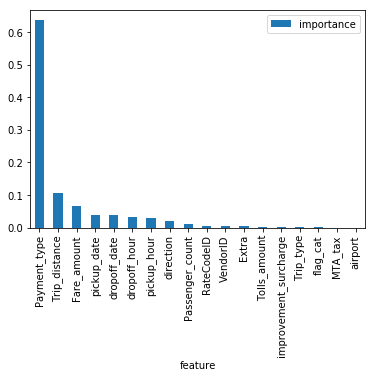

In [50]:
feature_col = green.drop(['Tip_percent', 'Tip_amount', 'Total_amount'], axis=1).columns

importances_new = pd.DataFrame({'feature': feature_col, 'importance': np.round(regr_new.feature_importances_, 3)})
importances_new = importances_new.sort_values('importance', ascending=False).set_index('feature')
print(importances_new)
importances_new.plot.bar()

Note: now the feature importance plot aligns well to the feature correlation heatmap, and Payment_type is decisive variable. Trip_distance, Fare_amount, pickup and dropoff time also play a significant role on inferring Tip_percent.

## <span style="color:DarkTurquoise">Q5-A-1: average speed over the course of a trip</span>

In [51]:
duration = (dropoff_time - pickup_time).apply(lambda x: x.total_seconds())
print(duration.shape)
speed = (green['Trip_distance']/duration * 3600).dropna()
speed = speed[speed < 100]
print(speed.describe())

(1490170,)
count    1.473912e+06
mean     1.307191e+01
std      6.184961e+00
min      4.170866e-04
25%      9.418605e+00
50%      1.183099e+01
75%      1.512356e+01
max      9.977143e+01
dtype: float64


Note: according to [New York speed limit](https://en.wikipedia.org/wiki/Speed_limits_in_the_United_States_by_jurisdiction), it is highly unlikely taxi speed will exceed 100 mph.

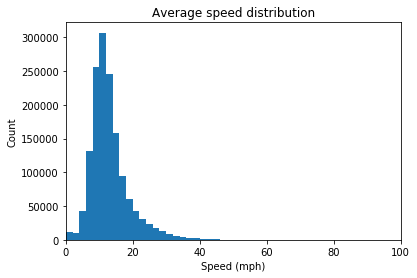

In [52]:
speed.plot(kind='hist', bins=50)
plt.xlabel('Speed (mph)')
plt.ylabel('Count')
plt.xlim((0,100))
plt.title('Average speed distribution')
plt.show()

## <span style="color:DarkTurquoise">Q5-A-2: ANOVA test for week and speed</span>

In [53]:
week = pickup_time.apply(lambda x: x.week)
print(week.value_counts())

speed_week = pd.concat([speed, week], keys=['speed', 'week'], axis=1).dropna()
mean_speed_by_week = speed_week.groupby('week').mean()
print('\nMean speed by week:')
print(mean_speed_by_week)

37    362950
38    359090
39    338049
36    298388
40    131693
Name: pickup_time, dtype: int64

Mean speed by week:
          speed
week           
36    13.528091
37    12.835530
38    12.846150
39    13.320130
40    12.668716


In [54]:
weeks = []
for w in range(36, 41):
    weeks.append(speed_week['speed'][speed_week['week'] == w].values)

stats.f_oneway(weeks[0], weeks[1], weeks[2], weeks[3], weeks[4])

F_onewayResult(statistic=925.9657395232883, pvalue=0.0)

Note: the ANOVA test indicates a large f-value and a small p-value, therefore we reject the null hypothesis and we conclude that the differences between the groups are statistically significant which implies that the week of the month does seem to be related to the average speed. 

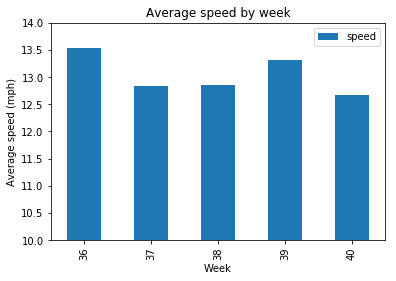

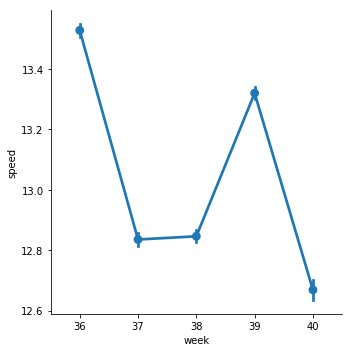

In [59]:
mean_speed_by_week.plot(kind='bar')
plt.title('Average speed by week')
plt.xlabel('Week')
plt.ylabel('Average speed (mph)')
plt.ylim((10,14))

sns.catplot(kind='point', x='week', y='speed', data=speed_week)
plt.show()

Note: the first plot shows the mean of average speed per week because we use mean statistics in ANOVA test. The second plot shows a more holistics distribution including median and IQR. We can observe that although within each week there is not much variation in average speed, it varies greatly between different weeks.

### <span style="color:DarkTurquoise">Answer to Q5-A-2: Hypothese: there might be seasonality factors, eg. the first week of September is the Labor Day holiday, there might be more traffic on highway than inner city, thus the average speed would be higher than other weeks.</span>

## <span style="color:DarkTurquoise">Q5-A-3: ANOVA test for hour and speed</span>

In [60]:
hour = green['pickup_hour']
print(hour.value_counts())

speed_hour = pd.concat([speed, hour], keys=['speed', 'hour'], axis=1).dropna()
mean_speed_by_hour = speed_hour.groupby('hour').mean()
print('\nMean speed by hour:')
print(mean_speed_by_hour)

18    97064
19    95971
20    90607
17    87808
21    86363
22    84513
23    79635
16    78895
15    73527
0     67007
14    66405
9     61785
8     58694
12    57582
13    57250
10    57182
11    56519
1     53642
7     41730
2     41108
3     31531
4     26297
6     22475
5     16580
Name: pickup_hour, dtype: int64

Mean speed by hour:
          speed
hour           
0     14.750411
1     15.016560
2     15.277092
3     15.671009
4     16.471329
5     18.316728
6     17.339568
7     13.664869
8     12.458878
9     12.744854
10    12.753272
11    12.501399
12    12.413636
13    12.332001
14    11.775644
15    11.432932
16    11.145854
17    11.097765
18    11.668873
19    12.205296
20    12.902699
21    13.750918
22    14.223989
23    14.499027


In [61]:
hours = []
for h in range(0, 24):
    hours.append(speed_hour['speed'][speed_hour['hour'] == h].values)

stats.f_oneway(hours[0], hours[1], hours[2], hours[3], hours[4], hours[5], hours[6], hours[7], hours[8], hours[9], hours[10], hours[11], hours[12], hours[13], hours[14], hours[15], hours[16], hours[17], hours[18], hours[19], hours[20], hours[21], hours[22], hours[23])   

F_onewayResult(statistic=4336.903969580409, pvalue=0.0)

Note: similarly, the ANOVA test indicates a large f-value and a small p-value, therefore we reject the null hypothesis and we conclude that the differences between the groups are statistically significant which implies that the hour of the day does seem to be related to the average speed. 

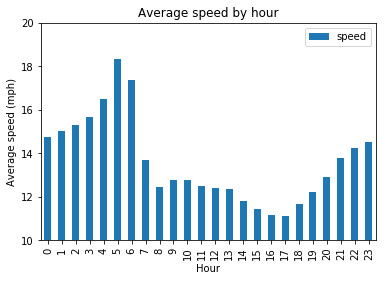

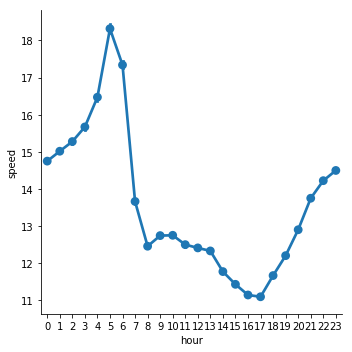

In [62]:
mean_speed_by_hour.plot(kind='bar')
plt.title('Average speed by hour')
plt.xlabel('Hour')
plt.ylabel('Average speed (mph)')
plt.ylim((10,20))

sns.catplot(kind='point', x='hour', y='speed', data=speed_hour)
plt.show()

Note: a saliet discrepancy can be observed from both mean plot and median plot.

### <span style="color:DarkTurquoise">Answer to Q5-A-3: Hypothesis: this might be a cyclic behavior, eg. on weekdays, there can be traffic jams when people commute to and back from work, thus speed at 8 and 16-17 are much lower; in early morning hours such as 4 or 5, there are few people taking a trip so that speed are higher.</span>

### Future work
<br> • A more scrutinized way of imputing zero Trip_distance and LGA area </br>
<br> • A more thorough analysis of features should be carried out to deal with multicollinearity </br>
<br> • A transformation of categorical variables to one-hot encoding
<br> • Train-test split before major imputation </br>
<br> • A grid search on hyperparameters such as max_depth, max_features, min_samples_leaf to optimize random forest regression and make it more robust </br>
<br> • An experiment with other models such as SVM with non-linear kernels, LightGBM or ensemble models </br>
<br> • A more general observation of multiple time slots (different months) and at multiple time window lengths (daily, weekly, monthly, yearly)

### Reference</br>
<br>[NYC Green Taxi data for September 2015](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml)</br>
<br>[Data dictionary](http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf)</br>
<br>[Factor correlation heatmap](https://www.kaggle.com/vincentlugat/lightgbm-plotly)</br>
<br>[Outlier identification](https://github.com/kthouz/NYC_Green_Taxi)
<br>[categorical variable encoding techniques](http://pbpython.com/categorical-encoding.html)</br>
<br>[Feature importance plot](https://www.kaggle.com/jkokatjuhha/in-depth-visualisations-simple-methods)</br>